In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import numpy as np
import sys
import tensorflow as tf

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
print("train set of image: %d 개" % (X_train.shape[0]))
print("test set of image: %d 개" % (X_test.shape[0]))

train set of image: 60000 개
test set of image: 10000 개


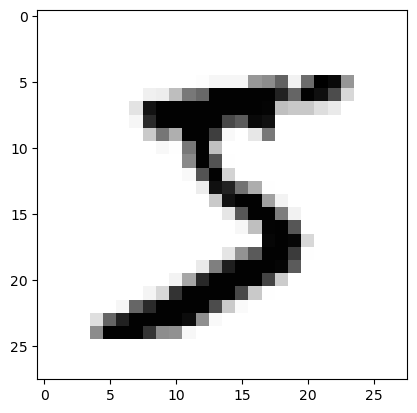

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [7]:
print(X_train[0].shape[0]) # 28*28 픽셀임을 확인

28


In [8]:
print(X_train[0].shape[1])

28


In [9]:
X_train = X_train.reshape(X_train.shape[0], 784) #28*28인 784를 써줘도 되고, -1도 가능 (3차원을 2차원으로 바꾸기 위해)
X_trian = X_train.astype(float)
X_train = X_train / 255

In [10]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
X_test = X_test.reshape(X_test.shape[0], -1).astype(float) / 255 

In [13]:
print(Y_train[0])

5


In [14]:
Y_train = utils.to_categorical(Y_train, 10)
Y_test = utils.to_categorical(Y_test, 10)

In [15]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [21]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15954, saving model to ./model\01-0.1595.hdf5

Epoch 00002: val_loss improved from 0.15954 to 0.10511, saving model to ./model\02-0.1051.hdf5

Epoch 00003: val_loss improved from 0.10511 to 0.08532, saving model to ./model\03-0.0853.hdf5

Epoch 00004: val_loss improved from 0.08532 to 0.07630, saving model to ./model\04-0.0763.hdf5

Epoch 00005: val_loss improved from 0.07630 to 0.06857, saving model to ./model\05-0.0686.hdf5

Epoch 00006: val_loss improved from 0.06857 to 0.06735, saving model to ./model\06-0.0673.hdf5

Epoch 00007: val_loss improved from 0.06735 to 0.06373, saving model to ./model\07-0.0637.hdf5

Epoch 00008: val_loss improved from 0.06373 to 0.06146, saving model to ./model\08-0.0615.hdf5

Epoch 00009: val_loss did not improve from 0.06146

Epoch 00010: val_loss did not improve from 0.06146

Epoch 00011: val_loss did not improve from 0.06146

Epoch 00012: val_loss improved from 0.06146 to 0.05870, saving model to ./model

In [22]:
print("Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9817
Test Accuracy: 0.9817


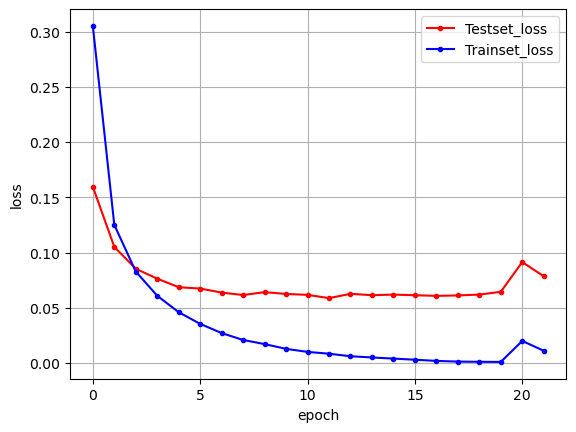

In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()